# Subject influence on MAE
Our goal is to determine whether any certain subjects result in worse models performance. In the case of General models, we want to see whether certain subjects worsen MAE performance. In the case of Individual models, we want to see whether certain subjects perform worse overall when trying to predict fatigue.

### Imports and Data

In [57]:
import pandas as pd
from pandas import read_csv as read
import ast
import matplotlib.pyplot as plt
import seaborn as sns

df_t_g = read('../outputs/general/test_general.csv')
df_t_i = read('../outputs/individual/test_individual.csv')

### General Models
Here, we check the general models to see if any subjects used in the testing subset may have influence on the resulting model. We do this by getting the best *n* (stored in `df_t_g_max`) and the worst *n* (stored in `df_t_g_min`) models for each model type.

*n* is defined below as the variable `n_models`.

In [58]:
# For each model, gets the models with the biggest/smallest 3 (?) MAE values
n_models = 10

df_t_g_best = df_t_g.groupby('Model').apply(lambda x: x.nsmallest(n_models, 'MAE')).drop('Model', axis=1).reset_index().drop('level_1', axis=1)
df_t_g_worst = df_t_g.groupby('Model').apply(lambda x: x.nlargest(n_models, 'MAE')).drop('Model', axis=1).reset_index().drop('level_1', axis=1)

In [59]:
# Function that gets the ocurrence percentage of subjects in a provided dataframe
def get_appearances(df_t_g_m):
    count = {}

    # Gets the list of training subjects from dataframe
    for test_set in df_t_g_m['Training Subjects'].tolist():
        test_set = ast.literal_eval(test_set)  # Converts training subjects value to tuple from string
        
        # Stores the count of subjects in dict (key = subject, val = count)
        for subject in test_set:
            count[int(subject)] = count.get(int(subject), 0) + 1

    # Gets the total number of models in DataFrame
    total = len(df_t_g_m['Training Subjects'].tolist())
    appearances = {}

    # Gets percentage that subject appears out of total, stores in dict
    for subj, app in count.items():
        appearances[f"Subject {subj}"] = round((app / total) * 100, 2)

    return {k: v for k, v in sorted(appearances.items(), key=lambda item: item[1], reverse=True)}

In [60]:
# Percent that subjects appear in best n models:
get_appearances(df_t_g_best)

{'Subject 3': 67.78,
 'Subject 13': 45.56,
 'Subject 9': 40.56,
 'Subject 6': 36.11,
 'Subject 16': 35.0,
 'Subject 15': 26.67,
 'Subject 2': 17.78,
 'Subject 12': 8.89,
 'Subject 1': 7.22,
 'Subject 8': 4.44,
 'Subject 4': 3.33,
 'Subject 17': 3.33,
 'Subject 10': 1.67,
 'Subject 5': 1.67}

In [61]:
# Percent that subjects appear in worst n models:
get_appearances(df_t_g_worst)

{'Subject 10': 50.56,
 'Subject 1': 48.89,
 'Subject 17': 45.56,
 'Subject 5': 36.11,
 'Subject 4': 30.0,
 'Subject 12': 26.11,
 'Subject 8': 19.44,
 'Subject 2': 17.78,
 'Subject 15': 7.78,
 'Subject 16': 5.0,
 'Subject 13': 3.89,
 'Subject 9': 3.33,
 'Subject 6': 2.78,
 'Subject 3': 2.78}

### Individual Models
Here, we check the individual models to see which subjects perform the best and worst at predicting fatigue using their own data. We do this by getting the best and worst *n* models by MAE for each model. 

In [62]:
n_subjects = 3

In [63]:
df_t_i_best = df_t_i.groupby(['Model']).apply(lambda x: x.nsmallest(n_subjects, 'MAE')).drop(['Model'], axis=1)
# Models 8, 5, 1 frequently perform the best

In [64]:
df_t_i_worst = df_t_i.groupby(['Model']).apply(lambda x: x.nlargest(n_subjects, 'MAE')).drop(['Model'], axis=1)
# Models 16, 6, 13 frequently perform the best

We can plot this too. Looking at the plot below, the worst performing subjects are almost always 16 and 6.

C:\Users\Build\AppData\Local\Temp\ipykernel_9564\1273700904.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.scatterplot(data=plt_df, x='MAE', y='Model', palette='coolwarm')


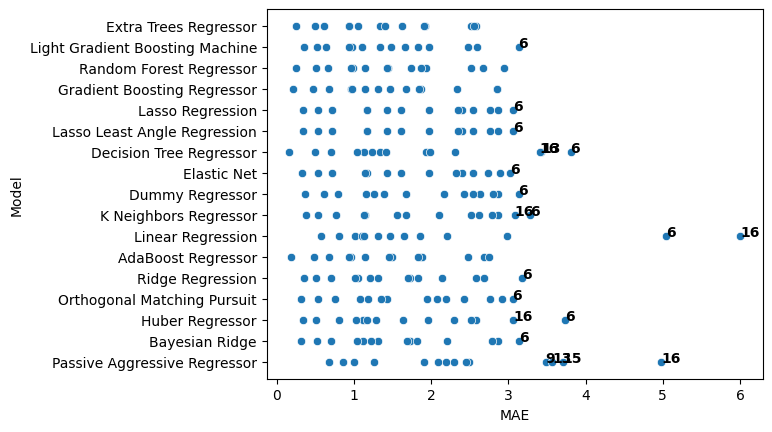

In [65]:
plt_df = df_t_i[df_t_i['Model'] != 'Least Angle Regression']
g = sns.scatterplot(data=plt_df, x='MAE', y='Model', palette='coolwarm')
for index, row in plt_df.iterrows():
    if row['MAE'] > 3:
        plt.text(row['MAE'], row['Model'], row['Subject'], horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.show()